# Spotify Reviews Analysis

## Importing Library

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Data

In [2]:
df = pd.read_csv('review_spotify.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              500000 non-null  object
 1   userName              500000 non-null  object
 2   userImage             500000 non-null  object
 3   content               499992 non-null  object
 4   score                 500000 non-null  int64 
 5   thumbsUpCount         500000 non-null  int64 
 6   reviewCreatedVersion  392854 non-null  object
 7   at                    500000 non-null  object
 8   replyContent          42609 non-null   object
 9   repliedAt             42609 non-null   object
 10  appVersion            392854 non-null  object
dtypes: int64(2), object(9)
memory usage: 42.0+ MB


In [4]:
df.sample(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
340318,e9299b5d-2a34-433c-ba87-e3c08cbde504,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"A huge selection of music, easy to navigate th...",5,0,8.9.32.624,2024-04-20 22:51:22,NaN,NaN,8.9.32.624
449985,509eb5b0-c6b9-4dea-8eb7-18530c1b85ce,Abhi,https://play-lh.googleusercontent.com/a-/ALV-U...,Recent changes made me very very frustrated 😑😑😠😠,1,0,8.8.68.565,2023-12-27 19:46:22,NaN,NaN,8.8.68.565
91271,72d97b82-2137-47e8-9199-58389e0a9c29,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I actually normally love Spotify, but uh... On...",2,1,9.0.2.459,2025-01-04 00:35:38,Hi. Have you tried a quick reinstall? If that ...,2025-01-04 02:49:46,9.0.2.459
145309,a6935aa1-96f8-4ec7-95f0-06727f4f8e54,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,❤️,5,0,NaN,2024-11-16 10:46:03,NaN,NaN,NaN
413885,1dbfbf7a-abe0-483d-b933-87867396d927,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Mad about money,1,0,8.8.80.599,2024-01-23 16:12:59,NaN,NaN,8.8.80.599


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

reviewId                     0
userName                     0
userImage                    0
content                      8
score                        0
thumbsUpCount                0
reviewCreatedVersion    107146
at                           0
replyContent            457391
repliedAt               457391
appVersion              107146
dtype: int64

#### Changing data type

In [7]:
df['at'] = pd.to_datetime(df['at'])

## Preprocessing

#### Dropping unused columns

In [8]:
df = df.drop(columns=['reviewId','userName','userImage','reviewCreatedVersion','replyContent','repliedAt'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   content        499992 non-null  object        
 1   score          500000 non-null  int64         
 2   thumbsUpCount  500000 non-null  int64         
 3   at             500000 non-null  datetime64[ns]
 4   appVersion     392854 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 19.1+ MB


#### Cleaning the appVersion data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   content        499992 non-null  object        
 1   score          500000 non-null  int64         
 2   thumbsUpCount  500000 non-null  int64         
 3   at             500000 non-null  datetime64[ns]
 4   appVersion     392854 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 19.1+ MB


In [11]:
def clean_app_version(val):
    if pd.isna(val):
        return 'Unknown'
    parts = str(val).split('.')
    return '.'.join(parts[:3])

df['appVersion'] = df['appVersion'].apply(clean_app_version)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   content        499992 non-null  object        
 1   score          500000 non-null  int64         
 2   thumbsUpCount  500000 non-null  int64         
 3   at             500000 non-null  datetime64[ns]
 4   appVersion     500000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 19.1+ MB


### Viz

#### Data Distribution

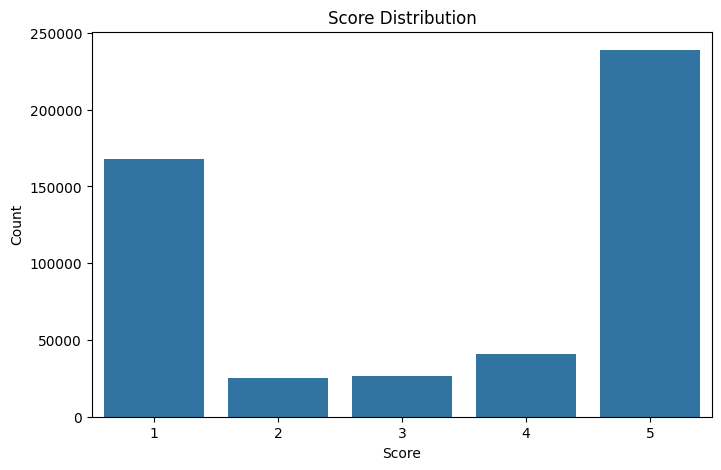

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='score', data=df)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

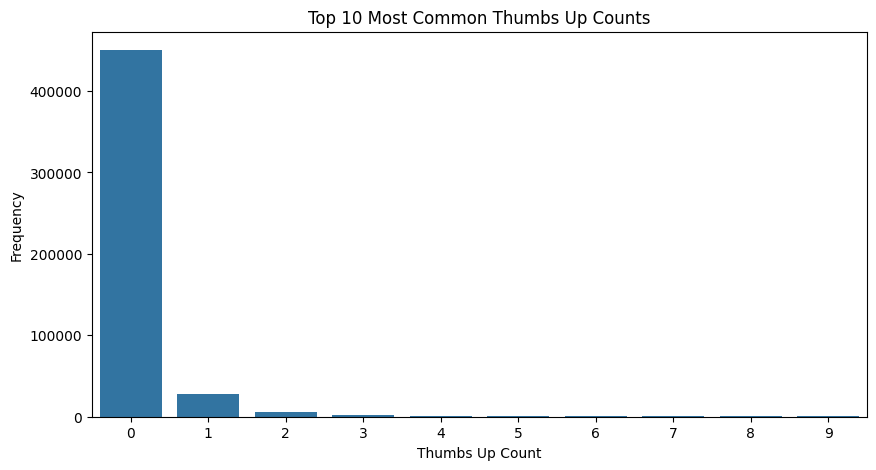

In [15]:
top_thumbs = df['thumbsUpCount'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_thumbs.index, y=top_thumbs.values)
plt.title('Top 10 Most Common Thumbs Up Counts')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()


In [19]:
top_thumbs

0    450251
1     28038
2      5515
3      2325
4      1438
5      1107
6       787
7       694
8       591
9       450
Name: thumbsUpCount, dtype: int64